In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import *
import h5py
from matplotlib import cm
from tqdm import tqdm
import pandas as pd
import sklearn
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from scipy.ndimage import gaussian_filter
import cv2
import os
from PIL import Image

In [3]:

def load_data(filename):
    with h5py.File(filename, "r") as f:
        evts = f["CD"]["events"]
        x=np.array(evts['x'])
        y=np.array(evts['y'])
        p=np.array(evts['p'])
        t=np.array(evts['t']) #microsegundos
        print(evts['x'])
    return x,y,p,t
filename='timed.hdf5'
x,y,p,t=load_data(filename)

[ 282 1198   10 ... 1178  136  451]


In [4]:
ind=np.where(t>9e6)
inde=ind[0][0]
print(inde)

17598922


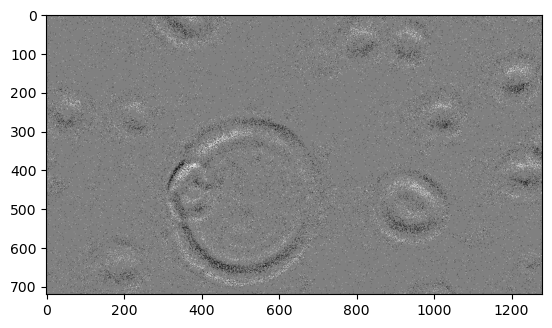

In [4]:
height=720
width=1280
delta=50000
with h5py.File("timed.hdf5", "r") as f:
    events = f["CD"]["events"]
    img = np.full((height, width, 3), 128, dtype=np.uint8)
    img[np.array(events['y'])[inde:inde+delta], np.array(events['x'])[inde:inde+delta]]= 255 * np.array(events['p'])[inde:inde+delta][:, None]
    y_e=np.array(events['y'])[inde:inde+delta]
    x_e=np.array(events['x'])[inde:inde+delta]
    p_e=np.array(events['p'])[inde:inde+delta]
    plt.imshow(img)

In [5]:
for i in range(len(p_e)):
    if p_e[i]==0:
        p_e[i]=-1

In [6]:
np.unique(p_e)

array([-1,  1], dtype=int16)

In [7]:

# Initialize an empty dictionary to store the sum of polarities for each pixel
polarity_sums = {}

# Iterate through each event
for event in range(len(x_e)):
    x = x_e[event]
    y = y_e[event]
    p = p_e[event]
    
    # Use the (x, y) tuple as the key in the dictionary
    pixel = (x, y)
    
    # If the pixel has been encountered before, update the polarity sum
    if pixel in polarity_sums:
        polarity_sums[pixel] += p*5
    else:
        # If the pixel is encountered for the first time, initialize its polarity sum
        polarity_sums[pixel] = p*5

# Separate lists for x, y, and polarity sums
final_x = []
final_y = []
final_polarity = []

# Populate the separate lists from the dictionary
for (x, y), polarity in polarity_sums.items():
    final_x.append(x)
    final_y.append(y)
    final_polarity.append(polarity)

# Print the results
for x, y, polarity in zip(final_x, final_y, final_polarity):
    print(f"Pixel ({x}, {y}) has a total polarity sum of {polarity}")


Pixel (867, 438) has a total polarity sum of -5
Pixel (609, 575) has a total polarity sum of -5
Pixel (544, 323) has a total polarity sum of -5
Pixel (918, 597) has a total polarity sum of -5
Pixel (1045, 489) has a total polarity sum of -10
Pixel (895, 10) has a total polarity sum of -5
Pixel (1159, 475) has a total polarity sum of 0
Pixel (1186, 58) has a total polarity sum of 0
Pixel (680, 358) has a total polarity sum of -5
Pixel (780, 90) has a total polarity sum of -5
Pixel (613, 640) has a total polarity sum of -5
Pixel (639, 68) has a total polarity sum of -5
Pixel (420, 468) has a total polarity sum of 5
Pixel (1140, 9) has a total polarity sum of -5
Pixel (707, 341) has a total polarity sum of 0
Pixel (626, 640) has a total polarity sum of 0
Pixel (579, 293) has a total polarity sum of -5
Pixel (61, 119) has a total polarity sum of -5
Pixel (673, 316) has a total polarity sum of -5
Pixel (963, 69) has a total polarity sum of 5
Pixel (604, 518) has a total polarity sum of -5
P

In [8]:
np.unique(final_polarity)

array([-145,  -50,  -10,   -5,    0,    5,   10,   30,   90])

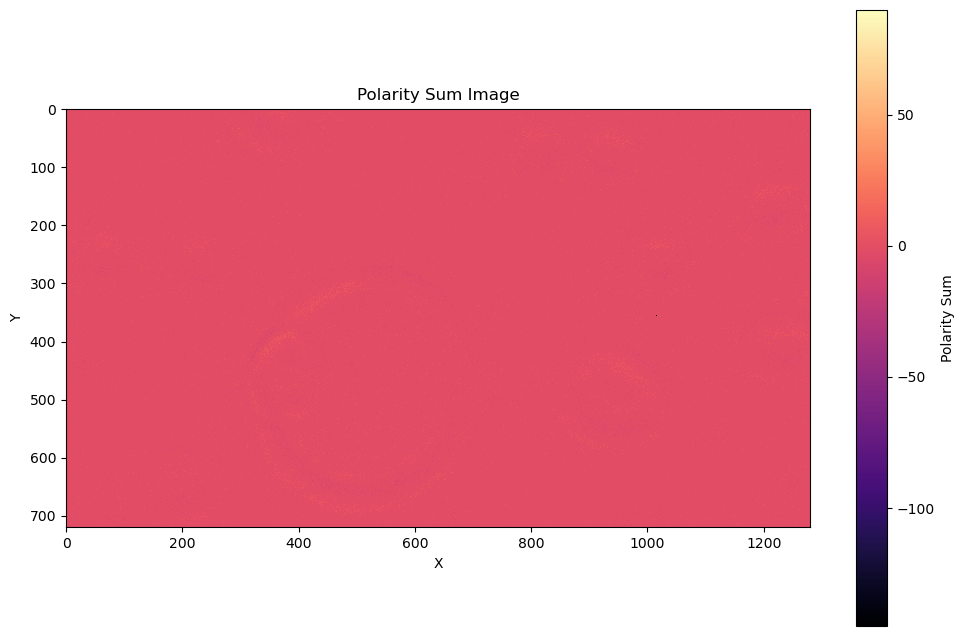

In [10]:
max_x = max(x_e)
max_y = max(y_e)

polarity_image = np.zeros((max_y + 1, max_x + 1))

for (x, y), polarity in polarity_sums.items():
    polarity_image[y, x] = polarity
fig,ax=plt.subplots(figsize=(12,8))
plt.imshow(polarity_image, cmap='magma', interpolation='nearest')
plt.colorbar(label='Polarity Sum')
ax.set_title('Polarity Sum Image')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()